## Set Up
Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from keras import models
from keras import layers

Using TensorFlow backend.


Define a utility function to plot model predictions

In [0]:
def plot_decision_boundary(model_fit, preprocess_x_fn, x1lim, x2lim, gridlen, train_x, train_y):
    '''
    Plot decision boundaries for a Keras model fit with 2 quantitative inputs
    
    Arugments:
     - model_fit: keras model fit
     - preprocess_x_fn: function to preprocess x
     - x1lim: tuple of lower and upper limits for x1
     - x2lim: tuple of lower and upper limits for x2
     - gridlen: how many values of x1 and x2 for which to obtain predictions
     - train_x: n by 2 array of x values for training set
     - train_y: n by 1 array of y values for training set
    '''
    dx1 = (x1lim[1] - x1lim[0])/gridlen
    dx2 = (x2lim[1] - x2lim[0])/gridlen
    background_x0, background_x1 = np.mgrid[slice(x1lim[0], x1lim[1] + dx1, dx1), slice(x2lim[0], x2lim[1] + dx2, dx2)]
    background_x0_long = background_x0[0:gridlen,0:gridlen].reshape((gridlen**2, 1))
    background_x1_long = background_x1[0:gridlen,0:gridlen].reshape((gridlen**2, 1))
    background_x = np.concatenate((background_x0_long, background_x1_long), axis = 1)
    if preprocess_x_fn is not None:
        background_x = preprocess_x_fn(background_x)
    
    yhat_long = (model_fit.predict(background_x) > 0.5)
    yhat = yhat_long.reshape((gridlen, gridlen))

    fig, ax = plt.subplots()
    im = ax.pcolormesh(background_x0, background_x1, yhat, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'), alpha = 0.2, edgecolors = 'none', antialiased = True)
    im = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
    plt.show()

## Example 1

### Data Generation

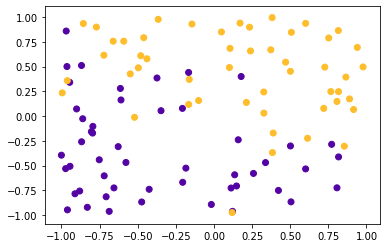

In [8]:
# set seed for reproducibility
np.random.seed(1)

# sample size
n = 100

# generate (x1, x2) (n by 2 matrix with observations in rows)
x = 2 * np.random.random((n, 2)) - 1

# parameters
b = 0
w = np.array([[3], [4]])

# probability of class 1
p1 = np.exp(b + np.dot(x, w)) / (1 + np.exp(b + np.dot(x, w)))
y = np.random.binomial(1, p1)[:, 0]

# make a plot
fig, ax = plt.subplots()
scatter = ax.scatter(x[:, 0], x[:, 1], c = y, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

### Fit a logistic regression model:

In [9]:
# define a logistic regression model
logistic_model = models.Sequential()
logistic_model.add(layers.Dense(1, activation = 'sigmoid', input_shape = (2,)))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
logistic_model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
logistic_model.fit(x, y, epochs = 1000, batch_size = 32)

Epoch 1/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.9359 - acc: 0.2900
Epoch 2/1000
100/100 [==============================] - 0s 190us/step - loss: 0.9320 - acc: 0.2900
Epoch 3/1000
100/100 [==============================] - 0s 138us/step - loss: 0.9271 - acc: 0.2900
Epoch 4/1000
100/100 [==============================] - 0s 146us/step - loss: 0.9233 - acc: 0.3000
Epoch 5/1000
100/100 [==============================] - 0s 183us/step - loss: 0.9194 - acc: 0.3000
Epoch 6/1000
100/100 [==============================] - 0s 153us/step - loss: 0.9152 - acc: 0.3000
Epoch 7/1000
100/100 [==============================] - 0s 166us/step - loss: 0.9114 - acc: 0.3000
Epoch 8/1000
100/100 [==============================] - 0s 246us/step - loss: 0.9071 - acc: 0.3100
Epoch 9/1000
100/100 [==============================] - 0s 218us/step - loss: 0.9030 - acc: 0.3100
Epoch 10/1000
100/100 [==============================] - 0s 187us/step - loss: 0.8995 - acc: 0.3100
Epoch 11/10

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


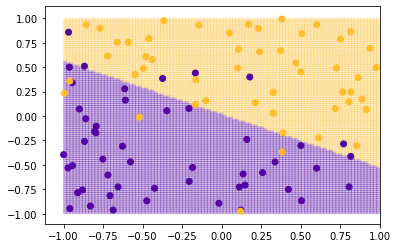

In [10]:
logistic_model.summary()
plot_decision_boundary(logistic_model, None, (-1, 1), (-1, 1), 101, x, y)

## Example 2
### Data Generation

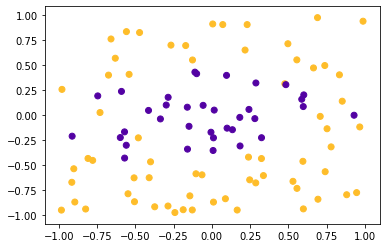

In [4]:
# set seed for reproducibility
np.random.seed(2)

# sample size
n = 100

# generate (x1, x2) (observations in columns)
x = 2 * np.random.random((n, 2)) - 1

def add_x_squared(x):
    return(np.concatenate((x, x**2), axis = 1))

x_mod = add_x_squared(x)

# parameters
b = -5
w = np.array([[0], [0], [5 * 12/9], [5 * 5]])

# prob of class 1
p1 = np.exp(b + np.dot(x_mod, w)) / (1 + np.exp(b + np.dot(x_mod, w)))

# generate y
y = np.random.binomial(1, p1)[:, 0]

# make a plot
fig, ax = plt.subplots()
scatter = ax.scatter(x[:, 0], x[:, 1], c = y, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

### Fit a Logistic Regression Model

In [0]:
# define a logistic regression model
logistic_model = models.Sequential()
logistic_model.add(layers.Dense(1, activation = 'sigmoid', input_shape = (2,)))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
logistic_model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
logistic_model.fit(x, y, epochs = 1000, batch_size = 32)

Epoch 1/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.8270 - acc: 0.4200
Epoch 2/1000
100/100 [==============================] - 0s 85us/step - loss: 0.8257 - acc: 0.4200
Epoch 3/1000
100/100 [==============================] - 0s 71us/step - loss: 0.8235 - acc: 0.4200
Epoch 4/1000
100/100 [==============================] - 0s 71us/step - loss: 0.8214 - acc: 0.4200
Epoch 5/1000
100/100 [==============================] - 0s 73us/step - loss: 0.8194 - acc: 0.4200
Epoch 6/1000
100/100 [==============================] - 0s 114us/step - loss: 0.8169 - acc: 0.4100
Epoch 7/1000
100/100 [==============================] - 0s 81us/step - loss: 0.8148 - acc: 0.4100
Epoch 8/1000
100/100 [==============================] - 0s 92us/step - loss: 0.8129 - acc: 0.4200
Epoch 9/1000
100/100 [==============================] - 0s 80us/step - loss: 0.8110 - acc: 0.4200
Epoch 10/1000
100/100 [==============================] - 0s 79us/step - loss: 0.8085 - acc: 0.4200
Epoch 11/1000
100/1

In [7]:
logistic_model.summary()
plot_decision_boundary(logistic_model, None, (-1, 1), (-1, 1), 101, x, y)

NameError: ignored

### Fit a *Quadratic* Logistic Regression Model

Epoch 1/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5544 - acc: 0.6000
Epoch 2/1000
100/100 [==============================] - 0s 72us/step - loss: 0.5538 - acc: 0.6000
Epoch 3/1000
100/100 [==============================] - 0s 76us/step - loss: 0.5532 - acc: 0.6000
Epoch 4/1000
100/100 [==============================] - 0s 77us/step - loss: 0.5526 - acc: 0.6100
Epoch 5/1000
100/100 [==============================] - 0s 75us/step - loss: 0.5519 - acc: 0.6100
Epoch 6/1000
100/100 [==============================] - 0s 82us/step - loss: 0.5514 - acc: 0.5900
Epoch 7/1000
100/100 [==============================] - 0s 86us/step - loss: 0.5509 - acc: 0.5900
Epoch 8/1000
100/100 [==============================] - 0s 83us/step - loss: 0.5503 - acc: 0.5900
Epoch 9/1000
100/100 [==============================] - 0s 84us/step - loss: 0.5497 - acc: 0.5900
Epoch 10/1000
100/100 [==============================] - 0s 83us/step - loss: 0.5492 - acc: 0.5900
Epoch 11/1000
100/10

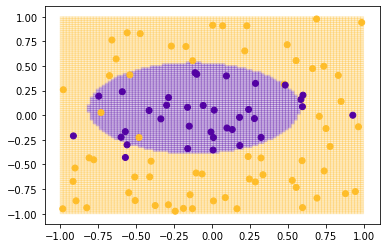

In [0]:
# define a logistic regression model
quadratic_logistic_model = models.Sequential()
quadratic_logistic_model.add(layers.Dense(1, activation = 'sigmoid', input_shape = (4,)))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
quadratic_logistic_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
quadratic_logistic_model.fit(x_mod, y, epochs = 1000, batch_size = 32)

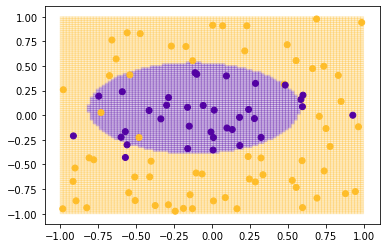

In [0]:
quadratic_logistic_model.summary()
plot_decision_boundary(quadratic_logistic_model, add_x_squared, (-1, 1), (-1, 1), 101, x, y)

### Fit a neural network with 1 hidden layer with 2 units

In [0]:
# define a neural network model
nnet_model1 = models.Sequential()
nnet_model1.add(layers.Dense(2, activation = 'tanh', input_shape = (2,)))
nnet_model1.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model1.fit(x, y, epochs = 2000, batch_size = 32)

Epoch 1/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.7199 - acc: 0.5600
Epoch 2/2000
100/100 [==============================] - 0s 102us/step - loss: 0.7183 - acc: 0.5500
Epoch 3/2000
100/100 [==============================] - 0s 93us/step - loss: 0.7164 - acc: 0.5400
Epoch 4/2000
100/100 [==============================] - 0s 90us/step - loss: 0.7149 - acc: 0.5400
Epoch 5/2000
100/100 [==============================] - 0s 81us/step - loss: 0.7133 - acc: 0.5400
Epoch 6/2000
100/100 [==============================] - 0s 98us/step - loss: 0.7119 - acc: 0.5400
Epoch 7/2000
100/100 [==============================] - 0s 96us/step - loss: 0.7103 - acc: 0.5400
Epoch 8/2000
100/100 [==============================] - 0s 104us/step - loss: 0.7087 - acc: 0.5400
Epoch 9/2000
100/100 [==============================] - 0s 93us/step - loss: 0.7074 - acc: 0.5400
Epoch 10/2000
100/100 [==============================] - 0s 103us/step - loss: 0.7062 - acc: 0.5400
Epoch 11/2000
100

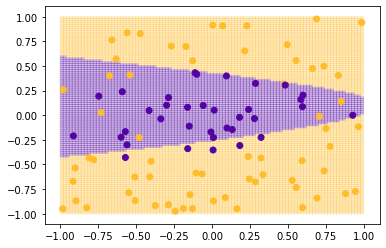

In [21]:
nnet_model1.summary()
plot_decision_boundary(nnet_model1, None, (-1, 1), (-1, 1), 101, x, y)

### Fit a neural network model with 2 hidden layers, each with 20 units

In [5]:
# define a neural network model with 2 hidden layers
nnet_model2 = models.Sequential()
nnet_model2.add(layers.Dense(20, activation = 'tanh', input_shape = (2,)))
nnet_model2.add(layers.Dense(20, activation = 'tanh'))
nnet_model2.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model2.fit(x, y, epochs = 2000, batch_size = 32)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2000





100/100 [==============================] - 10s 97ms/step - loss: 0.7505 - acc: 0.4400
Epoch 2/2000
100/100 [==============================] - 0s 193us/step - loss: 0.7485 - acc: 0.4400
Epoch 3/2000
100/100 [==============================] - 0s 182us/step - loss: 0.7469 - acc: 0.4400
Epoch 4/2000
100/100 [==============================] - 0s 193us/step - loss: 0.7454 - acc: 0.4400
Epoch 5/2000
100/100 [==============================] - 0s 178us/step - loss: 0.7436 - acc: 0.4400
Epoch 6/2000
100/100 [==============================] - 0s 175us/step - loss: 0.7421 - acc: 0.4500
Epoch 7/2000
100/100 [==============================] - 0s 152us/step - loss: 0.7402 - acc: 0.4500
Epoch 8/2000
100/100 [==============================] - 0s 178us/step - loss: 0.7385 - acc: 0.4500
Epoch 9/2000
100/100 [==============================] - 0s 162us/step - loss: 0.7366 - acc: 0.4500
Ep

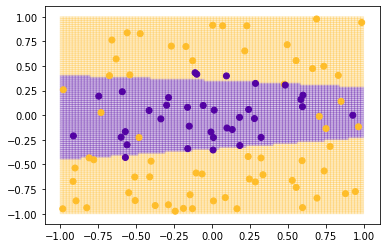

In [6]:
nnet_model2.summary()
plot_decision_boundary(nnet_model2, None, (-1, 1), (-1, 1), 101, x, y)

## Example 3

This example is adapted from http://cs231n.github.io/neural-networks-case-study/

### Data Generation

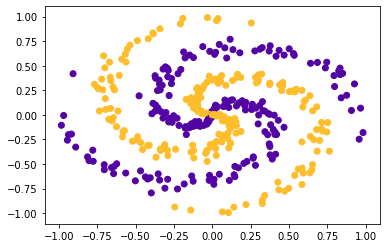

In [0]:
# set seed for reproducibility
np.random.seed(3)

# sample size per group
n = 100

k = 4 # number of branches
x = np.zeros((n*k, 2)) # data matrix (each row = single example)
y = np.zeros((n*k, 1)) # class labels
for j in range(k):
  ix = range(n*j,n*(j+1))
  r = np.linspace(0.0,1,n) # radius
  t = np.linspace(j * 2 * 2 * np.pi / k + j * 2 * np.pi / k, (j+1) * 2 * 2 * np.pi / k + (j+1) * 2 * np.pi / k,n) + np.random.randn(n)*0.2 # theta
  x[ix, :] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix, :] = np.mod(j, 2)

# make a plot
fig, ax = plt.subplots()
scatter = ax.scatter(x[:, 0], x[:, 1], c = y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

### Fit a neural network with 1 hidden layer with 20 units

In [0]:
# define a neural network model
nnet_model1 = models.Sequential()
nnet_model1.add(layers.Dense(20, activation = 'tanh', input_shape = (2,)))
nnet_model1.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model1.fit(x, y, epochs = 1000, batch_size = 32)

Epoch 1/1000
400/400 [==============================] - 0s 786us/step - loss: 0.6999 - acc: 0.5100
Epoch 2/1000
400/400 [==============================] - 0s 49us/step - loss: 0.6979 - acc: 0.5050
Epoch 3/1000
400/400 [==============================] - 0s 48us/step - loss: 0.6969 - acc: 0.5050
Epoch 4/1000
400/400 [==============================] - 0s 47us/step - loss: 0.6961 - acc: 0.5075
Epoch 5/1000
400/400 [==============================] - 0s 42us/step - loss: 0.6953 - acc: 0.4950
Epoch 6/1000
400/400 [==============================] - 0s 41us/step - loss: 0.6949 - acc: 0.5025
Epoch 7/1000
400/400 [==============================] - 0s 42us/step - loss: 0.6945 - acc: 0.4825
Epoch 8/1000
400/400 [==============================] - 0s 44us/step - loss: 0.6939 - acc: 0.4875
Epoch 9/1000
400/400 [==============================] - 0s 42us/step - loss: 0.6937 - acc: 0.4925
Epoch 10/1000
400/400 [==============================] - 0s 42us/step - loss: 0.6936 - acc: 0.5000
Epoch 11/1000
400/

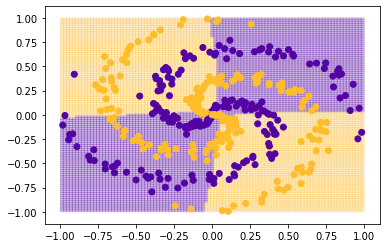

In [0]:
nnet_model1.summary()
plot_decision_boundary(nnet_model1, None, (-1, 1), (-1, 1), 101, x, y[:,0])

### Fit a neural network with 2 hidden layers, each with 20 units

In [0]:
# define a neural network model with 2 hidden layers
nnet_model2 = models.Sequential()
nnet_model2.add(layers.Dense(20, activation = 'tanh', input_shape = (2,)))
nnet_model2.add(layers.Dense(20, activation = 'tanh'))
nnet_model2.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model2.fit(x, y, epochs = 1000, batch_size = 32)

Epoch 1/1000
400/400 [==============================] - 1s 2ms/step - loss: 0.6994 - acc: 0.4925
Epoch 2/1000
400/400 [==============================] - 0s 46us/step - loss: 0.6954 - acc: 0.4950
Epoch 3/1000
400/400 [==============================] - 0s 50us/step - loss: 0.6943 - acc: 0.4825
Epoch 4/1000
400/400 [==============================] - 0s 56us/step - loss: 0.6942 - acc: 0.4875
Epoch 5/1000
400/400 [==============================] - 0s 63us/step - loss: 0.6936 - acc: 0.4950
Epoch 6/1000
400/400 [==============================] - 0s 47us/step - loss: 0.6936 - acc: 0.5125
Epoch 7/1000
400/400 [==============================] - 0s 50us/step - loss: 0.6944 - acc: 0.4725
Epoch 8/1000
400/400 [==============================] - 0s 48us/step - loss: 0.6941 - acc: 0.5025
Epoch 9/1000
400/400 [==============================] - 0s 52us/step - loss: 0.6936 - acc: 0.5000
Epoch 10/1000
400/400 [==============================] - 0s 52us/step - loss: 0.6931 - acc: 0.4525
Epoch 11/1000
400/40

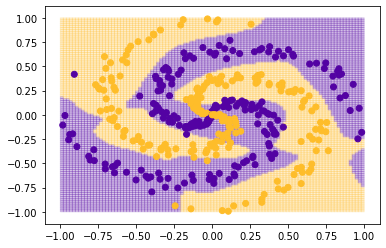

In [0]:
nnet_model2.summary()
plot_decision_boundary(nnet_model2, None, (-1, 1), (-1, 1), 101, x, y[:,0])